### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = wn

/tmp/ipykernel_2897/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1085.840536
std,292.559287,292.585209
min,438.920000,7.274256
25%,914.620000,887.023934
50%,1144.650000,1091.265323
75%,1316.280729,1285.506521
max,1570.252238,2179.901899


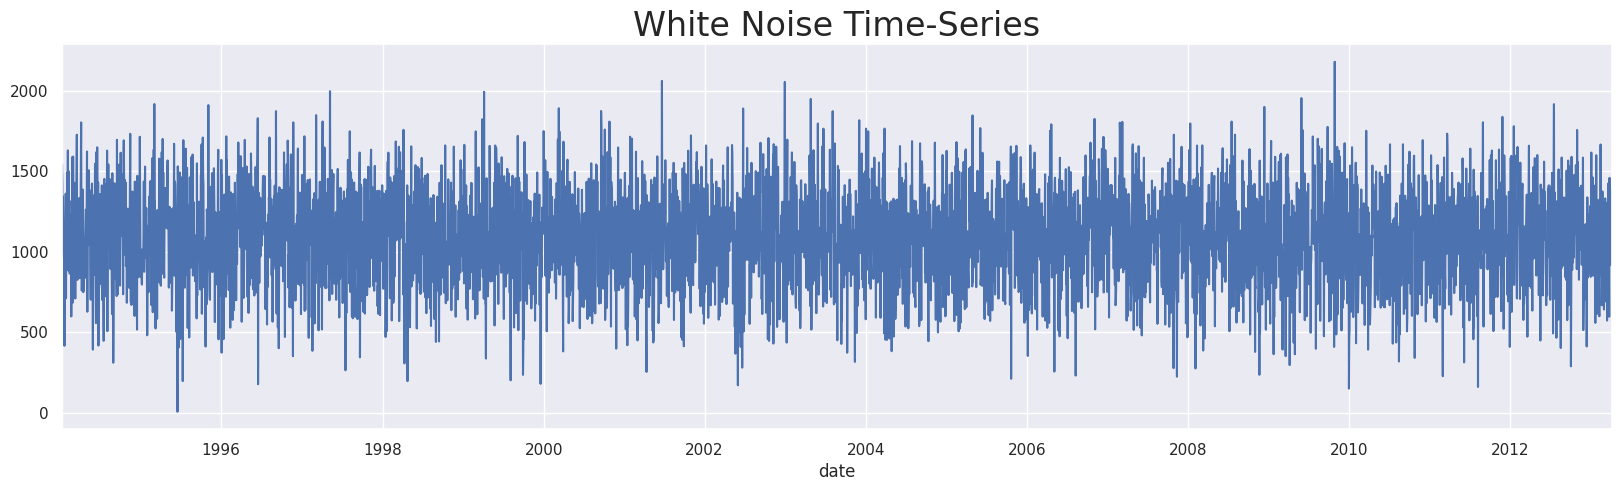

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

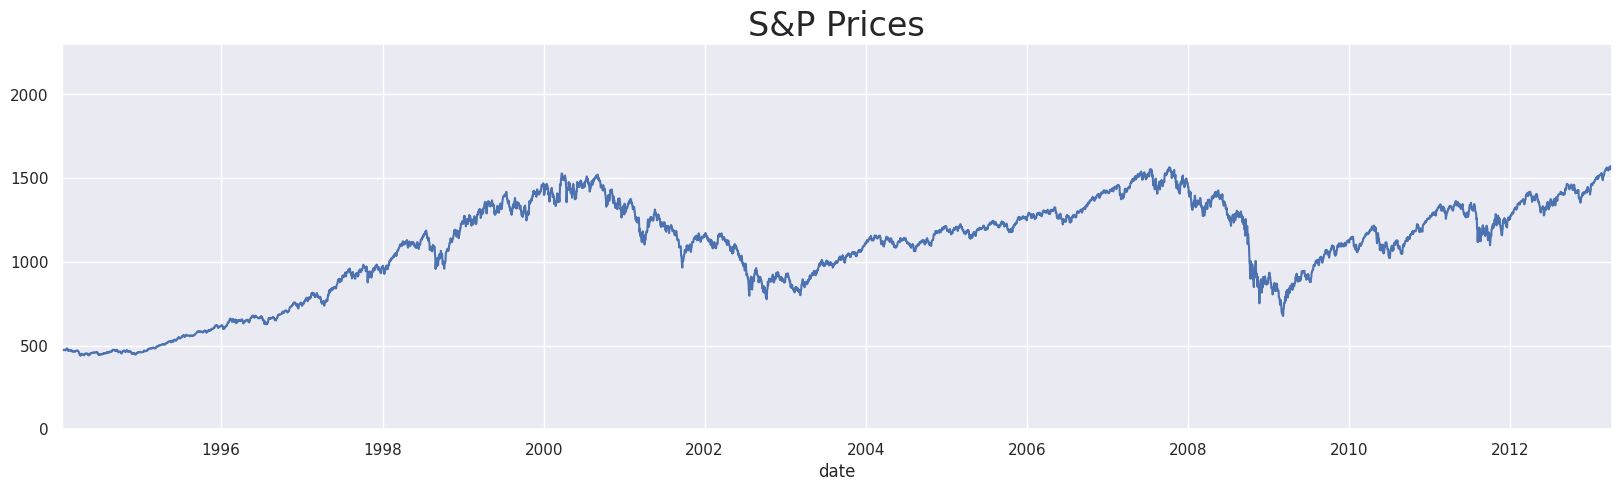

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [10]:
rw = pd.read_csv("RandWalk.csv")


In [11]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [12]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [13]:
rw.set_index("date", inplace = True)


In [14]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [15]:
rw = rw.asfreq('b')

In [16]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price

/tmp/ipykernel_2897/818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [18]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,971.855502,1122.139662
1994-01-10,475.27,1541.700005,1080.347860
1994-01-11,474.13,1430.523052,1082.095245
1994-01-12,474.17,1100.168927,1083.639265
1994-01-13,472.47,1343.437233,1067.146255


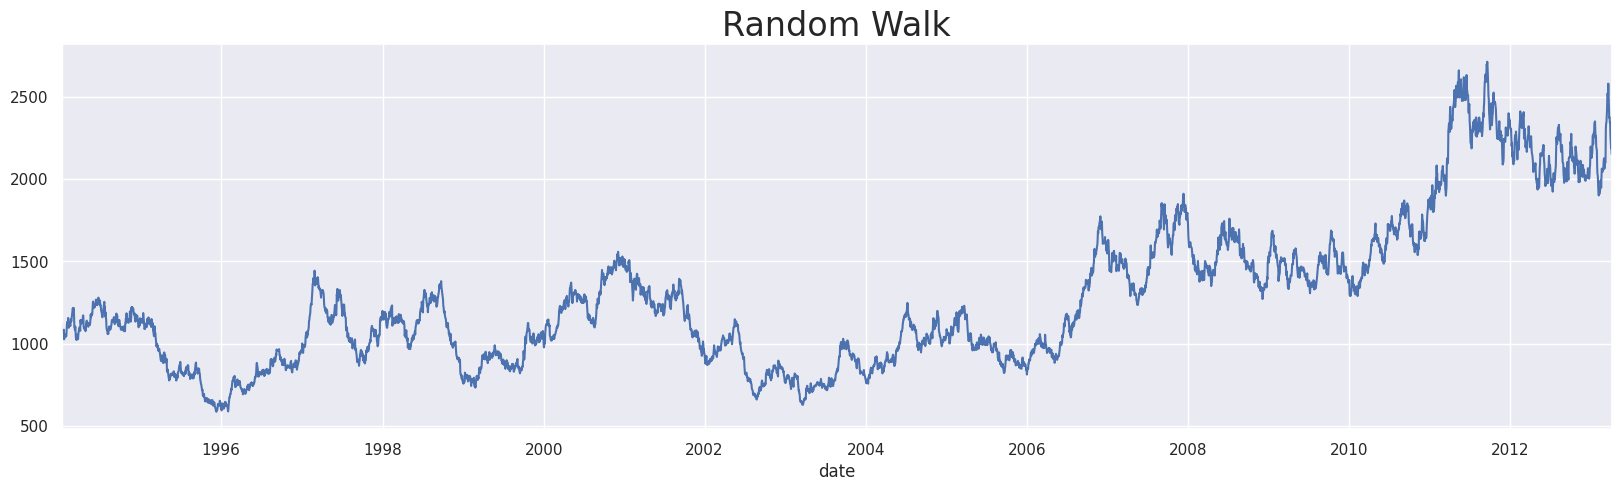

In [19]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

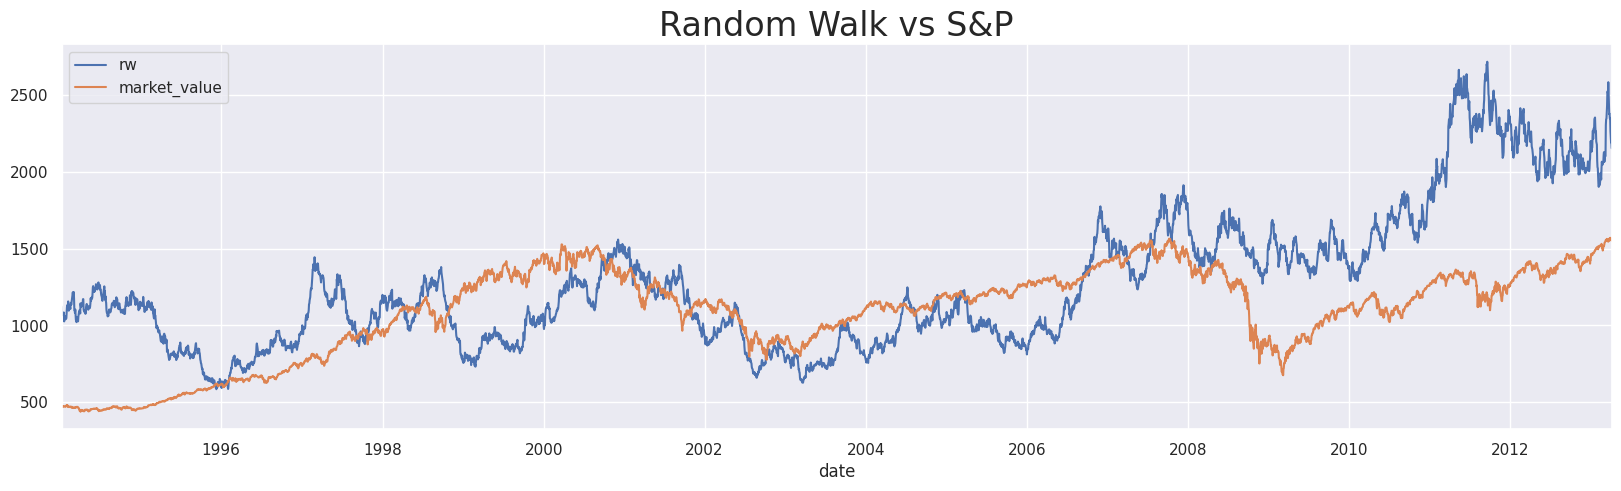

In [20]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Stationarity

In [21]:
resultados_adf = sts.adfuller(df['market_value'])
# Imprimimos los resultados
print("Estadística de la prueba ADF:", resultados_adf[0])
print("Valor p:", resultados_adf[1])
print("Número de rezagos utilizados:", resultados_adf[2])
print("Número de observaciones:", resultados_adf[3])
print("Valores críticos para diferentes niveles de significancia:")
for key, value in resultados_adf[4].items():
    print(f"   {key}: {value}")
print("Estimación de la varianza del error:", resultados_adf[5])

Estadística de la prueba ADF: -1.736984745235245
Valor p: 0.4121645696770616
Número de rezagos utilizados: 18
Número de observaciones: 5002
Valores críticos para diferentes niveles de significancia:
   1%: -3.431658008603046
   5%: -2.862117998412982
   10%: -2.567077669247375
Estimación de la varianza del error: 39904.880607487445


In [22]:
sts.adfuller(df.wn)

(-70.59819378986215,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70813.57997011748)

In [23]:
sts.adfuller(df.rw)


(-1.3286073927689712,
 0.6159849181617387,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

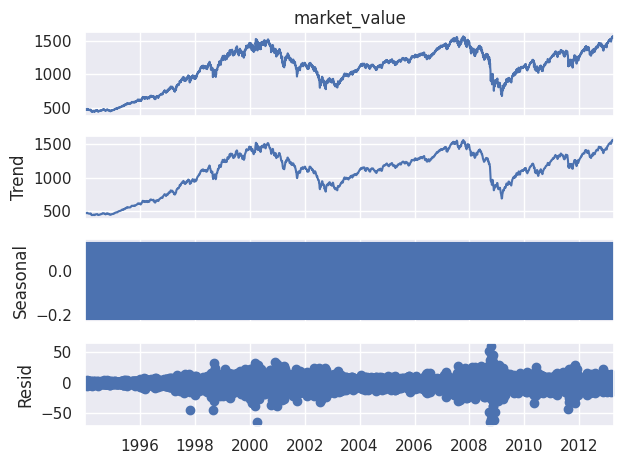

In [24]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

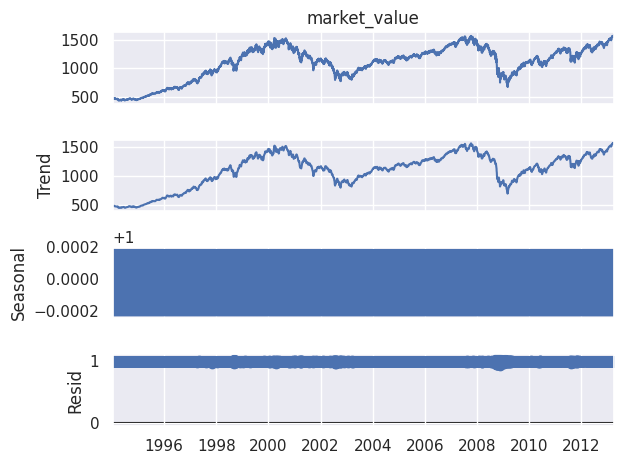

In [25]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

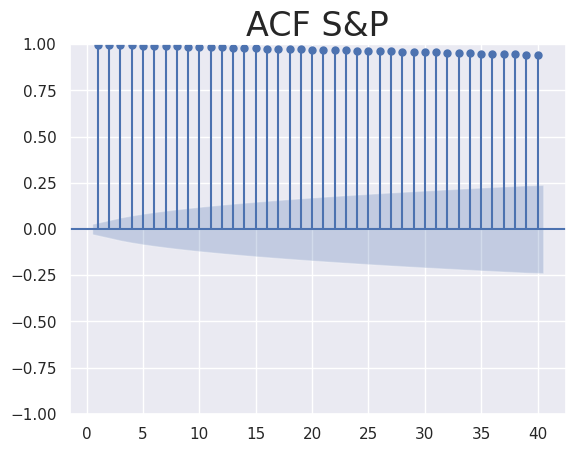

In [26]:
sgt.plot_acf(df["market_value"], lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

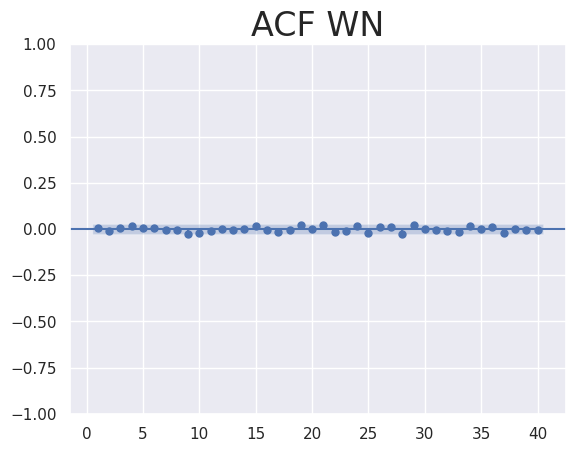

In [27]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

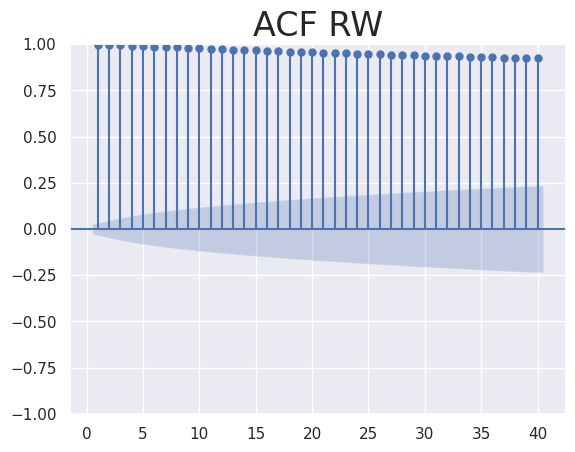

In [28]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

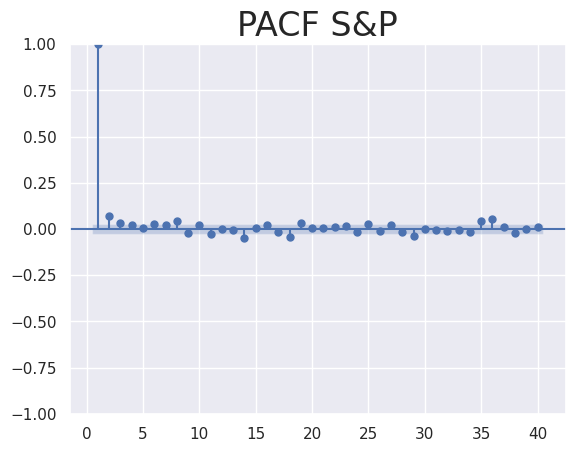

In [29]:
sgt.plot_pacf(df["market_value"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

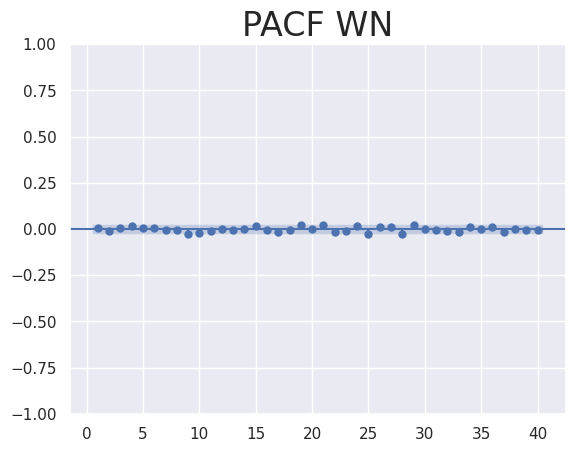

In [30]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

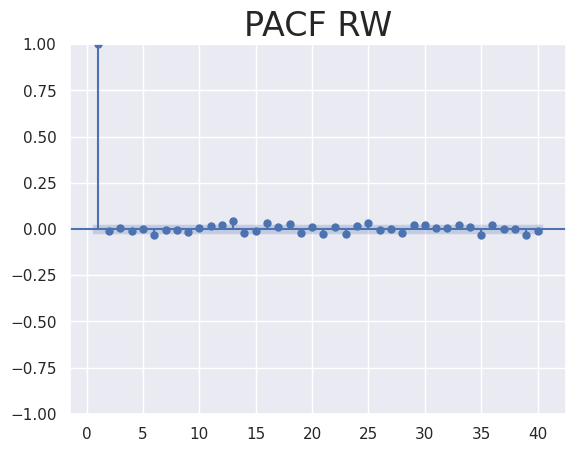

In [31]:
sgt.plot_pacf(df["rw"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()